In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})

In [3]:
filepath = "c:/Users/Jacob/Nonlinearity/Data/"

In [4]:
def loadData(path, date):
    df = np.loadtxt(filepath+date+"/Trial1/10.0V/Delays.txt")
    df = df[:, 0:2]
    
    return df

In [5]:
SampleA_para_prefreeze = loadData(filepath, "2020-07-23")
SampleA_perp_prefreeze = loadData(filepath, "2020-07-28")

SampleA_para_postfreeze_run1 = loadData(filepath, "2020-09-01")
SampleA_perp_postfreeze_run1 = loadData(filepath, "2020-09-01_02")

SampleA_para_postfreeze_run2 = loadData(filepath, "2020-09-14")
SampleA_perp_postfreeze_run2 = loadData(filepath, "2020-09-14_02")

In [6]:
SampleA_para = [SampleA_para_prefreeze, SampleA_para_postfreeze_run1, SampleA_para_postfreeze_run2]
para_labels = ["Parallel pre-freeze", "Parallel post-freeze_run1", "Parallel post-freeze_run2"]

SampleA_perp = [SampleA_perp_prefreeze, SampleA_perp_postfreeze_run1, SampleA_perp_postfreeze_run2]
perp_labels = ["Perpendicular pre-freeze", "Perpendicular post-freeze_run1", "Perpendicular post-freeze_run2"]

In [7]:
plt.figure(figsize=(12,8))
plt.plot(Run1[:,0], Run1[:,1], '-o', label='Run 1')
plt.plot(Run2[:,0], Run2[:,1], '-o', label='Run 2')
plt.plot(Run3[:,0], Run3[:,1], '-o', label='Run 3')
plt.plot(Run4[:,0], Run4[:,1], '-o', label='Run 4')
plt.plot(Run5[:,0], Run5[:,1], '-o', label='Run 5')
plt.plot(Run6[:,0], Run6[:,1], '-o', label='Run 6')
plt.plot(Run7[:,0], Run7[:,1], '-o', label='Run 7')


plt.xlabel("Transmission delay ($\mu$s)")
plt.ylabel("Time delay (ns)")
plt.title('COS Sample B')
plt.legend()
plt.grid()
plt.show()

NameError: name 'Run1' is not defined

<Figure size 864x576 with 0 Axes>

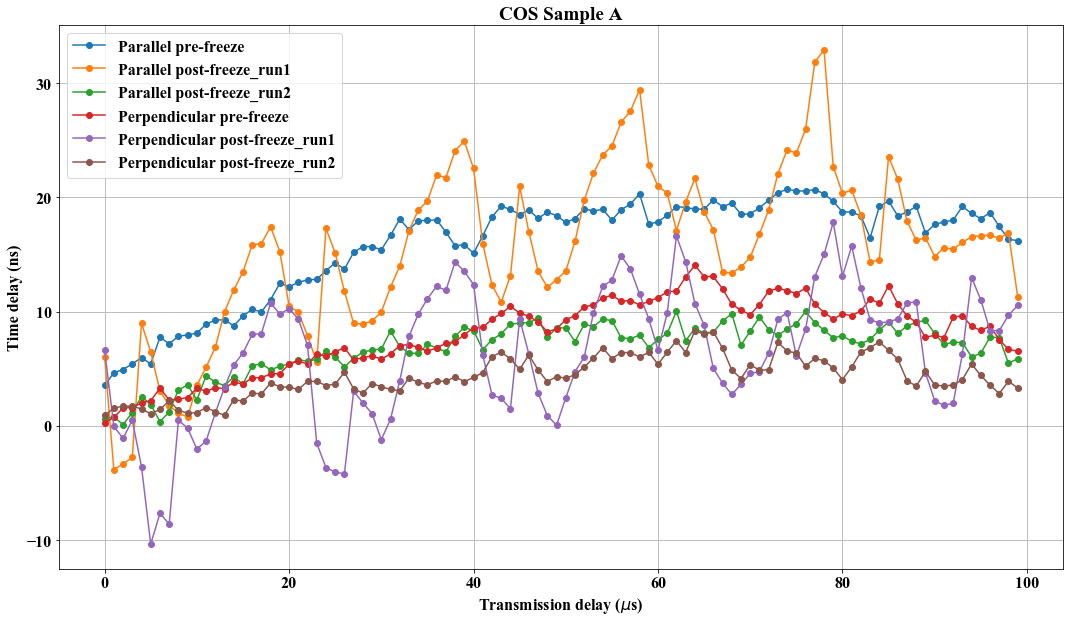

In [8]:
plt.figure(figsize=(18,10))

[plt.plot(SampleA_para[i][:,0], SampleA_para[i][:,1], '-o', label = para_labels[l]) for i, l in zip(range(len(SampleA_para)), range(len(SampleA_para)))]
[plt.plot(SampleA_perp[i][:,0], SampleA_perp[i][:,1], '-o', label = perp_labels[l]) for i, l in zip(range(len(SampleA_perp)), range(len(SampleA_para)))]


plt.xlabel("Transmission delay ($\mu$s)")
plt.ylabel("Time delay (ns)")
plt.title('COS Sample A')
plt.legend()
plt.grid()
plt.show()

The first run after freezing looks kind of weird, we see large increase in the higher frequency component. This result parallels with Gallot et al. 2015 conclusion that water/humidity content impacts the high frequency component of the nonlinear signal. Lets have a look at these frequency components.

1e-06


C:\Users\Jacob\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


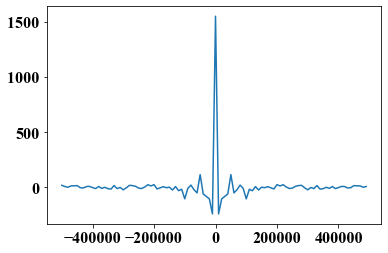

In [11]:
nt = len(SampleA_para[0])
dt = (SampleA_para[0][2][0] - SampleA_para[0][1][0]) * 1e-6
print(dt)
f = np.fft.fftshift(np.fft.fftfreq(nt, dt))
ft = np.fft.fftshift(np.fft.fft(SampleA_para[1][:,1]))
plt.plot(f, ft);

Let's take a look at the pre-freeze and the second post-freeze runs

In [43]:
SampleA_para_2 = [SampleA_para_prefreeze, SampleA_para_postfreeze_run2]
para_labels_2 = ["Parallel pre-freeze", "Parallel post-freeze_run2"]

SampleA_perp_2 = [SampleA_perp_prefreeze, SampleA_perp_postfreeze_run2]
perp_labels_2 = ["Perpendicular pre-freeze", "Perpendicular post-freeze_run2"]

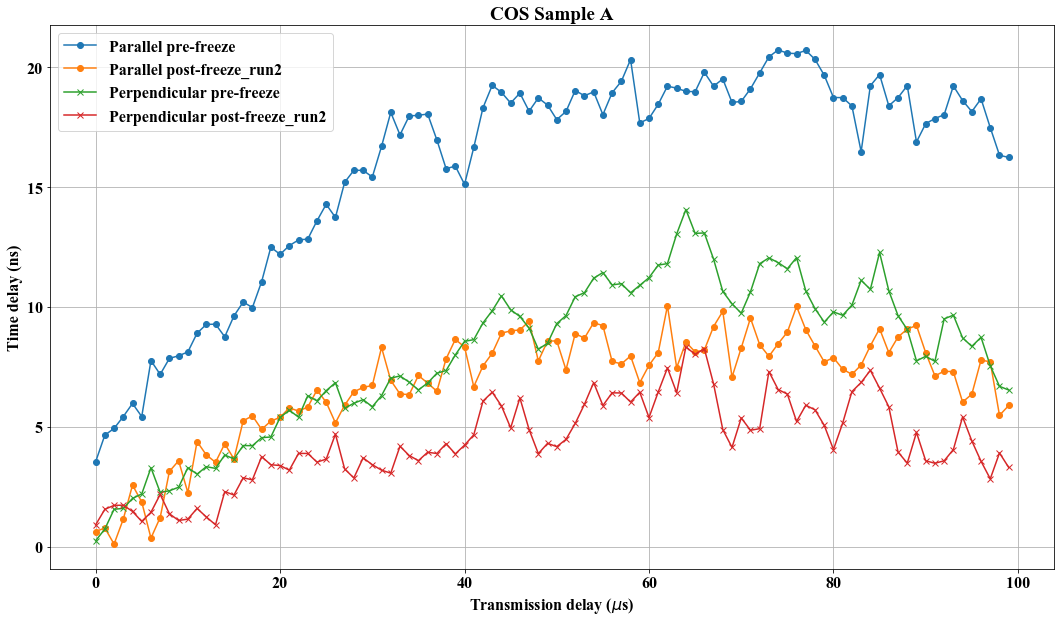

In [45]:
plt.figure(figsize=(18,10))

[plt.plot(SampleA_para_2[i][:,0], SampleA_para_2[i][:,1], '-o', label = para_labels_2[l]) for i, l in 
 zip(range(len(SampleA_para_2)), range(len(SampleA_para_2)))]
[plt.plot(SampleA_perp_2[i][:,0], SampleA_perp_2[i][:,1], '-x', label = perp_labels_2[l]) for i, l in 
 zip(range(len(SampleA_perp_2)), range(len(SampleA_para_2)))]


plt.xlabel("Transmission delay ($\mu$s)")
plt.ylabel("Time delay (ns)")
plt.title('COS Sample A')
plt.legend()
plt.grid()
plt.show()